In [14]:
from itertools import accumulate

import numpy as np
from scipy.stats import qmc
import seaborn as sns
from scipy.stats import uniform
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from sympy.stats.sampling.sample_numpy import numpy
from default import *
import mlflow

# Introduction

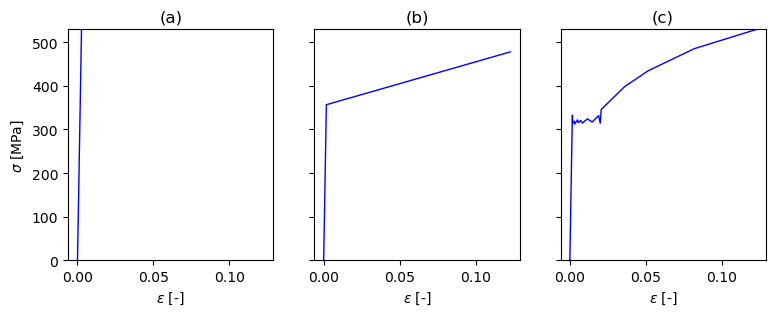

In [2]:
# Figure 1
stress_strain = np.loadtxt('other/LP1_Specimen_1_processed_data.csv', delimiter=',', skiprows=1)[:, 2:]

e_min = stress_strain[:, 0].min()
e_max = stress_strain[:, 0].max()
f_min = stress_strain[:, 1].min()
f_max = stress_strain[:, 1].max()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax1.plot(np.linspace(e_min, e_max), np.linspace(e_min, e_max) * 200e3, c='b', lw=1)
ax2.plot(np.linspace(e_min, 0.001775), np.linspace(e_min, 0.001775) * 200e3, c='b', lw=1)
ax2.plot(np.linspace(0.001775, e_max), 0.001775 * 200e3 + np.linspace(0.001775, e_max) * 1e3, c='b', lw=1)
ax3.plot(stress_strain[:, 0], stress_strain[:, 1], c='b', lw=1)

ax1.set_ylim(0, f_max)

ax1.set_ylabel("$\sigma$ [MPa]")
ax1.set_xlabel("$\epsilon$ [-]")
ax2.set_xlabel("$\epsilon$ [-]")
ax3.set_xlabel("$\epsilon$ [-]")

ax1.set_title("(a)")
ax2.set_title("(b)")
ax3.set_title("(c)")

plt.savefig('figures/strain_stress_graph.pdf', bbox_inches='tight', )

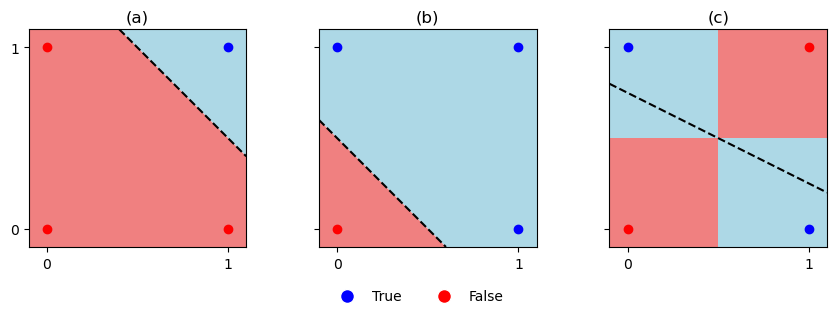

In [3]:
# AND OR XOR figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)

# Create scatter plots with labels
ax1.scatter([1], [1], c='blue', label='True')
ax1.scatter([0, 0, 1], [0, 1, 0], c='red', label='False')
ax1.axline([1, .5], slope=-1, ls='--', c='black')
ax1.add_patch(plt.Rectangle((1.5, 0.), width=10, height=10, angle=45, color='lightblue', lw=0, zorder=-1))
ax1.add_patch(plt.Rectangle((1.5, 0.), width=-10, height=10, angle=45, color='lightcoral', lw=0, zorder=-1))

ax2.scatter([0, 1, 1], [1, 0, 1], c='blue', label='True')
ax2.scatter([0], [0], c='red', label='False')
ax2.axline([0, .5], slope=-1, ls='--', c='black')
ax2.add_patch(plt.Rectangle((1, -.5), width=10, height=10, angle=45, color='lightblue', lw=0, zorder=-1))
ax2.add_patch(plt.Rectangle((1, -.5), width=-10, height=10, angle=45, color='lightcoral', lw=0, zorder=-1))

ax3.scatter([0, 1], [1, 0], c='blue', label='True')
ax3.scatter([0, 1], [0, 1], c='red', label='False')
ax3.axline([.5, .5], slope=-.5, ls='--', c='black')
ax3.add_patch(plt.Rectangle((.5, .5), width=-10, height=10, angle=0, color='lightblue', lw=0, zorder=-1))
ax3.add_patch(plt.Rectangle((.5, .5), width=10, height=10, angle=0, color='lightcoral', lw=0, zorder=-1))
ax3.add_patch(plt.Rectangle((.5, .5), width=10, height=-10, angle=0, color='lightblue', lw=0, zorder=-1))
ax3.add_patch(plt.Rectangle((.5, .5), width=-10, height=-10, angle=0, color='lightcoral', lw=0, zorder=-1))

ax1.set_title("(a)")
ax2.set_title("(b)")
ax3.set_title("(c)")

# Set the same limits for all axes
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(-.1, 1.1)
    ax.set_xlim(-.1, 1.1)

    # Set ticks to only show 0 and 1
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])

    # Make axes equal (square)
    ax.set_aspect('equal')

# Add a single legend for the entire figure
# Create custom handles for the legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='True'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='False')
]

# Place the legend outside the subplots
fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.1),
           ncol=2, frameon=False)

# Add more space at the bottom for the legend
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Make space for the legend at the bottom

plt.savefig('figures/perceptron problem.pdf', bbox_inches='tight', )

# Dataset generation

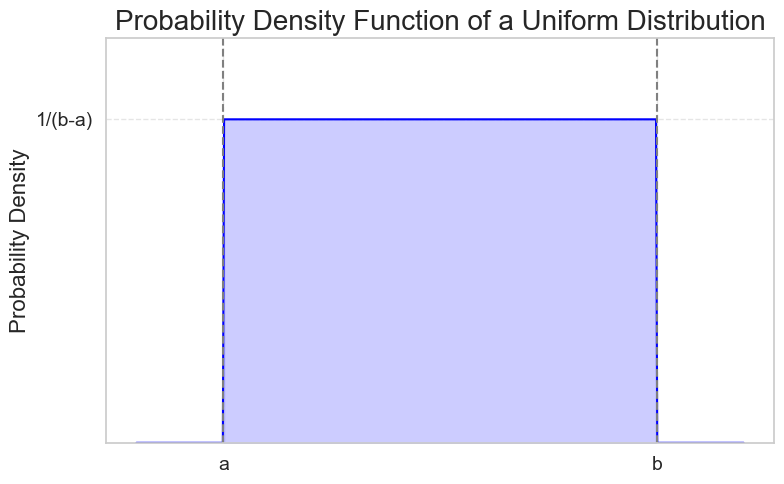

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters of the uniform distribution
a = 2
b = 7
pdf_height = 1 / (b - a)

# Generate x values
x = np.linspace(a - 1, b + 1, 500)
y = np.where((x >= a) & (x <= b), pdf_height, 0)

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, color='blue', label='Uniform PDF')
plt.fill_between(x, y, 0, where=(y > 0), color='blue', alpha=0.2)

# Annotate a and b with dashed lines
plt.axvline(a, color='gray', linestyle='--')
plt.axvline(b, color='gray', linestyle='--')

# Set ticks with larger font size
plt.xticks([a, b], labels=['a', 'b'], fontsize=14)
plt.yticks([pdf_height], labels=[f'1/(b-a)'], fontsize=14)

# Style the plot
plt.title('Probability Density Function of a Uniform Distribution', fontsize=20)
plt.ylabel('Probability Density', fontsize=16)
plt.ylim(0, pdf_height + 0.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Save and show the plot
plt.savefig("figures/03/uniform_distribution.pdf")
plt.show()


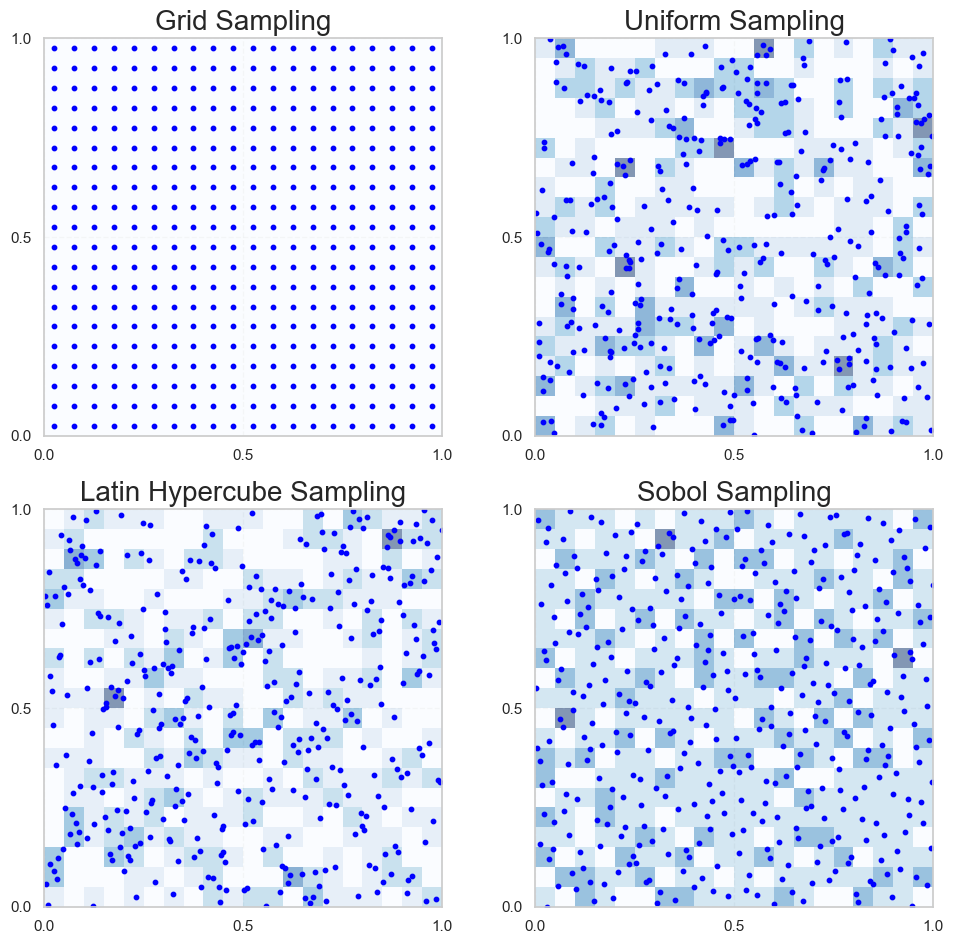

In [17]:
# Number of samples
n_points = 400
n_side = int(np.sqrt(n_points))  # For grid

# Sampling methods
# 1. Grid sampling
x_grid = np.linspace(0, 1, n_side, endpoint=False) + 0.5/n_side
X_grid = np.array(np.meshgrid(x_grid, x_grid)).reshape(2, -1).T

# 2. Uniform random sampling
X_uniform = np.random.rand(n_points, 2)

# 3. Latin Hypercube Sampling
sampler_lhs = qmc.LatinHypercube(d=2)
X_lhs = sampler_lhs.random(n=n_points)

# 4. Sobol Sampling
sampler_sobol = qmc.Sobol(d=2, scramble=True)
X_sobol = sampler_sobol.random_base2(m=9)  # 2^9 = 512 > 400
X_sobol = X_sobol[:n_points]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
methods = ['Grid', 'Uniform', 'Latin Hypercube', 'Sobol']
samples = [X_grid, X_uniform, X_lhs, X_sobol]

for ax, method, X in zip(axs.flat, methods, samples):
    # 2D histogram for density
    ax.hist2d(X[:, 0], X[:, 1], bins=20, range=[[0, 1], [0, 1]],
              cmap='Blues', alpha=0.5)

    # Scatter plot on top
    ax.scatter(X[:, 0], X[:, 1], color='blue', s=10)

    ax.set_title(f"{method} Sampling", fontsize=12)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])
    ax.set_aspect('equal')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("figures/03/sampling_density_comparison.pdf")
plt.show()


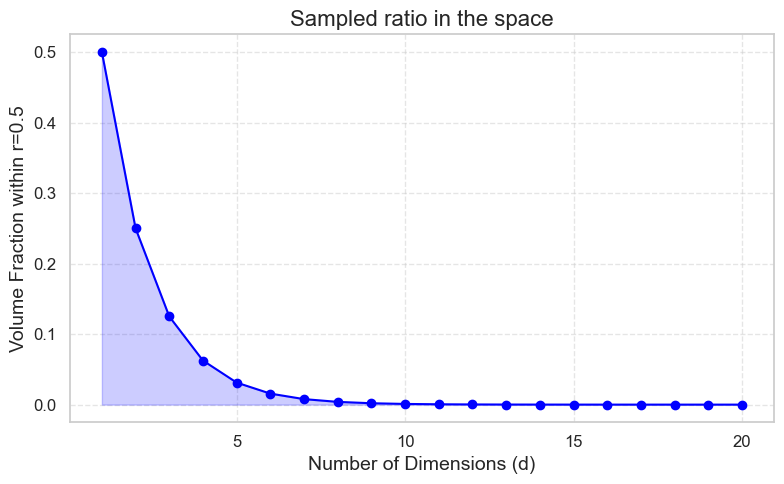

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Dimensions to consider
dimensions = np.arange(1, 21)
# Volume of a hypercube is always 1 (unit cube [0,1]^d)
# Volume of a hypersphere of radius r in d dimensions
r = 0.5  # fixed radius
volume_fraction = (r ** dimensions)  # fraction of unit cube occupied by central ball

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(dimensions, volume_fraction, marker='o', color='blue')
plt.fill_between(dimensions, volume_fraction, color='blue', alpha=0.2)

plt.title("Sampled ratio in the space", fontsize=16)
plt.xlabel("Number of Dimensions (d)", fontsize=14)
plt.ylabel("Volume Fraction within r=0.5", fontsize=14)
plt.xticks([5*i for i in range(1,5)], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("figures/03/curse_of_dimensionality_1.pdf")
plt.show()

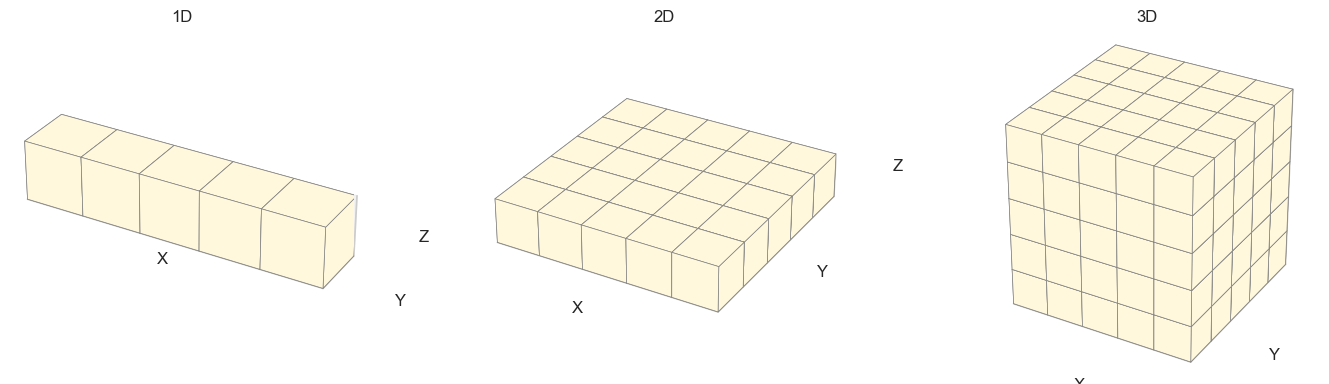

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

def draw_cube(ax, origin, size=1, color='cornsilk'):
    # Define the corners of a cube
    x, y, z = origin
    r = [0, size]
    vertices = np.array([[x+dx, y+dy, z+dz] for dx in r for dy in r for dz in r])

    # Define the 6 cube faces
    faces = [
        [vertices[i] for i in [0,1,3,2]], # bottom
        [vertices[i] for i in [4,5,7,6]], # top
        [vertices[i] for i in [0,1,5,4]], # front
        [vertices[i] for i in [2,3,7,6]], # back
        [vertices[i] for i in [0,2,6,4]], # left
        [vertices[i] for i in [1,3,7,5]]  # right
    ]

    cube = Poly3DCollection(faces, facecolors=color, edgecolors='gray', linewidths=0.5)
    ax.add_collection3d(cube)

def draw_grid(ax, dims):
    nx, ny, nz = dims
    for x in range(nx):
        for y in range(ny):
            for z in range(nz):
                draw_cube(ax, (x, y, z))

    ax.set_xlim(0, max(1, nx))
    ax.set_ylim(0, max(1, ny))
    ax.set_zlim(0, max(1, nz))
    ax.set_box_aspect([max(1, nx), max(1, ny), max(1, nz)])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    if nz > 0:
        ax.set_zlabel('Z')

fig = plt.figure(figsize=(12, 4))

# 1D plot
ax1 = fig.add_subplot(131, projection='3d')
draw_grid(ax1, (5, 1, 1))
ax1.set_title("1D")

# 2D plot
ax2 = fig.add_subplot(132, projection='3d')
draw_grid(ax2, (5, 5, 1))
ax2.set_title("2D")

# 3D plot
ax3 = fig.add_subplot(133, projection='3d')
draw_grid(ax3, (5, 5, 5))
ax3.set_title("3D")

plt.tight_layout()
plt.show()


# MLP Training

In [122]:
mlflow.set_tracking_uri(uri=MLFLOW_URI(port=5003))
data = {}
experiment_names = ["StiffnessToLoadLoss+MSE_no_noise_dataset_size",
                    "StiffnessToLoadLoss_no_noise_dataset_size",
                    "MSE_no_noise_dataset_size"]

names = {"StiffnessToLoadLoss+MSE_no_noise_dataset_size": 'MSE+PINN',
           "StiffnessToLoadLoss_no_noise_dataset_size": 'PINN',
           "MSE_no_noise_dataset_size": 'MSE'}

markers = {"StiffnessToLoadLoss+MSE_no_noise_dataset_size": 'o',
           "StiffnessToLoadLoss_no_noise_dataset_size": '^',
           "MSE_no_noise_dataset_size": 's'}

for experiment_name in experiment_names:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

    cols = [c for c in runs_df if c.startswith('metrics.')]
    metrics_names = [col[col.index('.') + 1:] for col in cols]
    del cols

    sizes = sorted(set(runs_df['params.train_size'].unique()), key=lambda x: int(x))

    client = mlflow.tracking.MlflowClient()
    results = {k1: {k2: [] for k2 in metrics_names} for k1 in sizes}
    for size in sizes:
        run_ids = runs_df[runs_df['params.train_size'] == size]['run_id']
        for run_id in run_ids:
            for metric_name in metrics_names:
                results[size][metric_name].append([m.value for m in client.get_metric_history(run_id, metric_name)])

    for k in results.keys():
        for metric in results[k].keys():
            results[k][metric] = np.vstack(results[k][metric]).mean(axis=0)

    data[experiment_name] = results

sizes = list(data[experiment_names[0]].keys())
metrics = list(data[experiment_names[0]][sizes[0]])
metrics = set(["_".join(m.split('_')[1:]) for m in metrics])

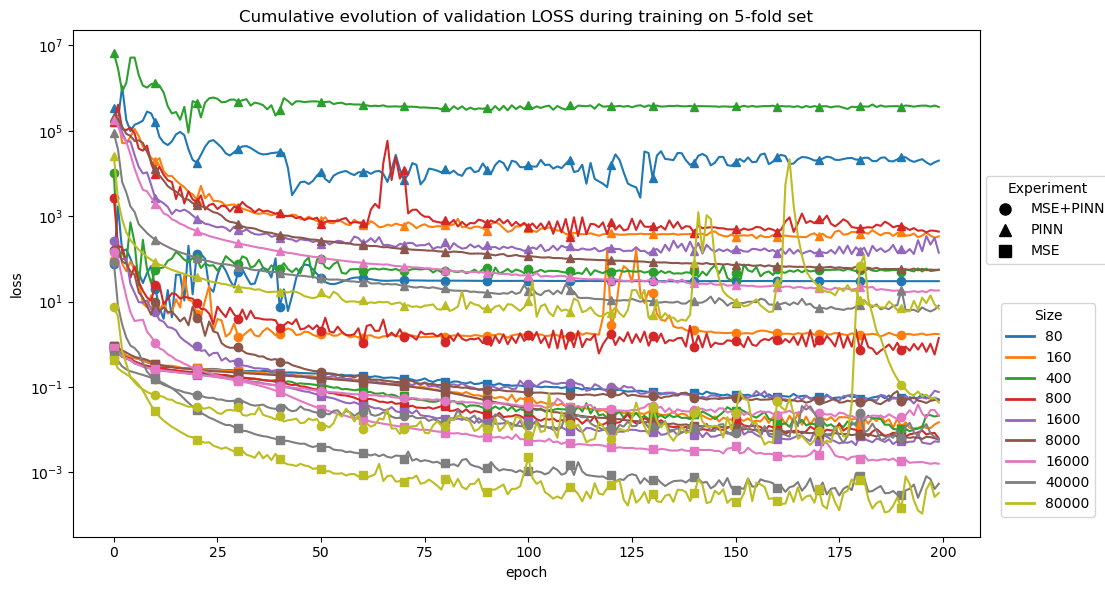

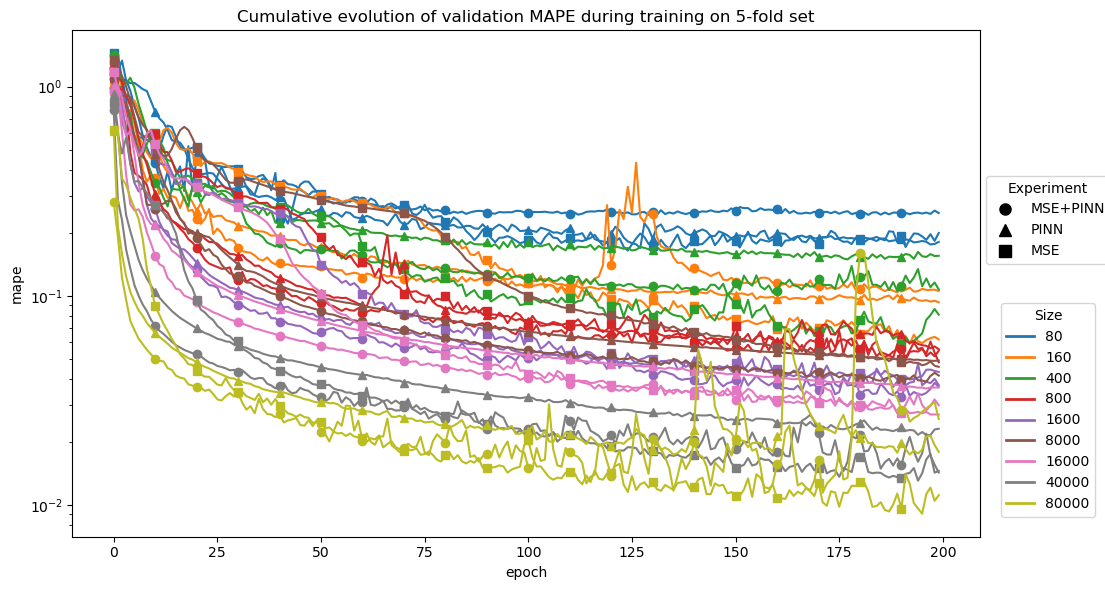

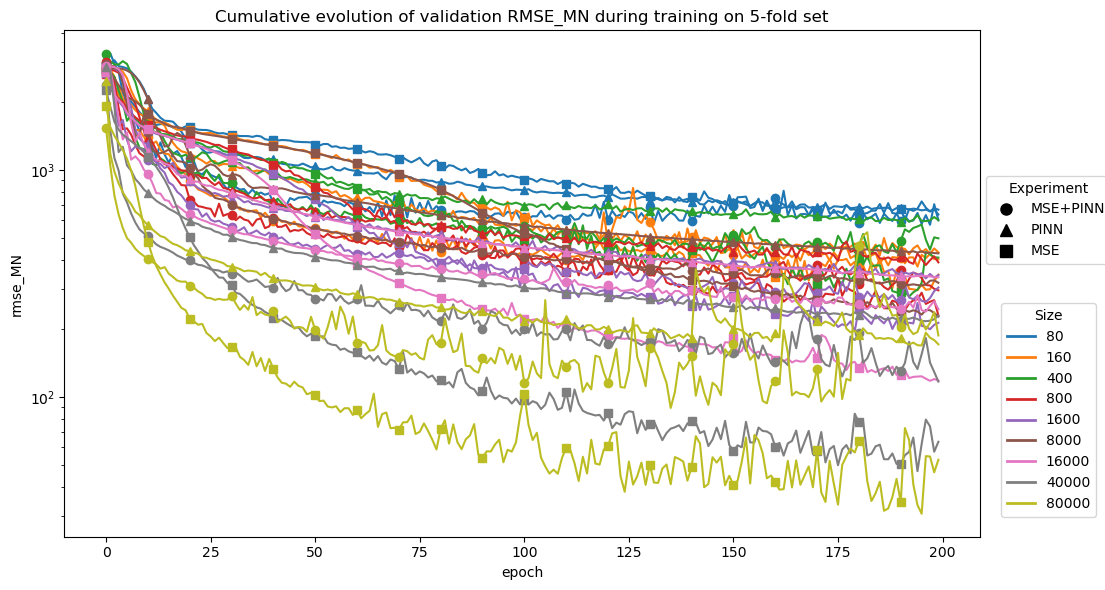

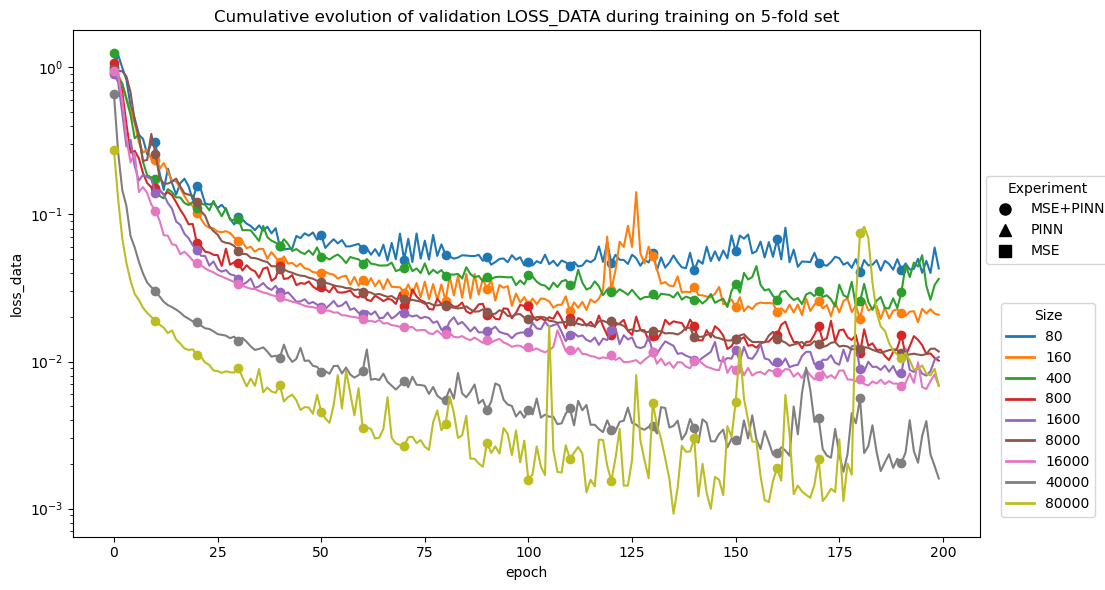

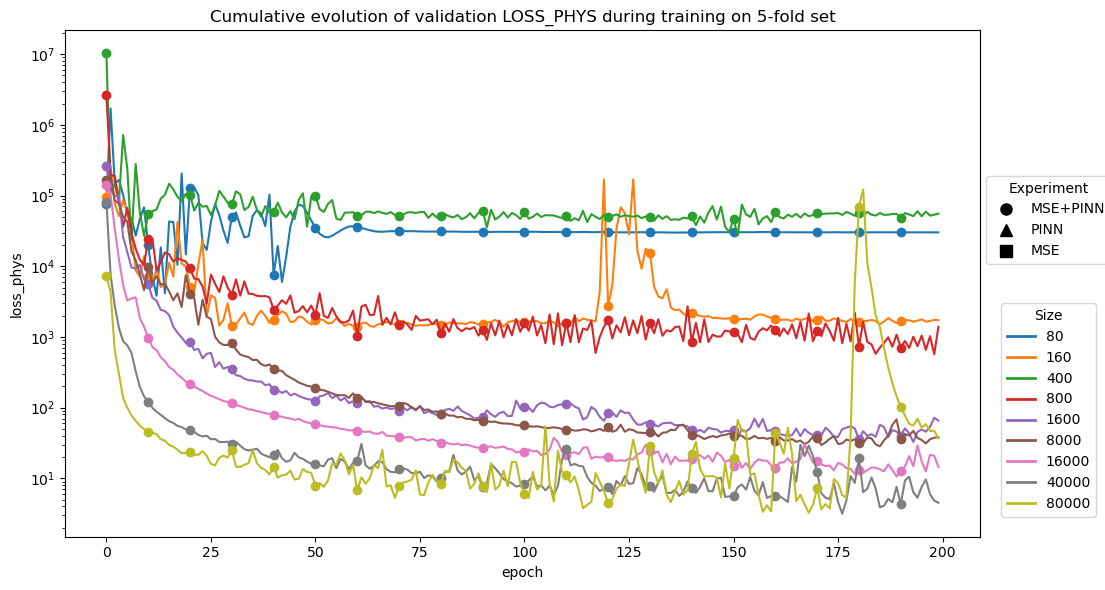

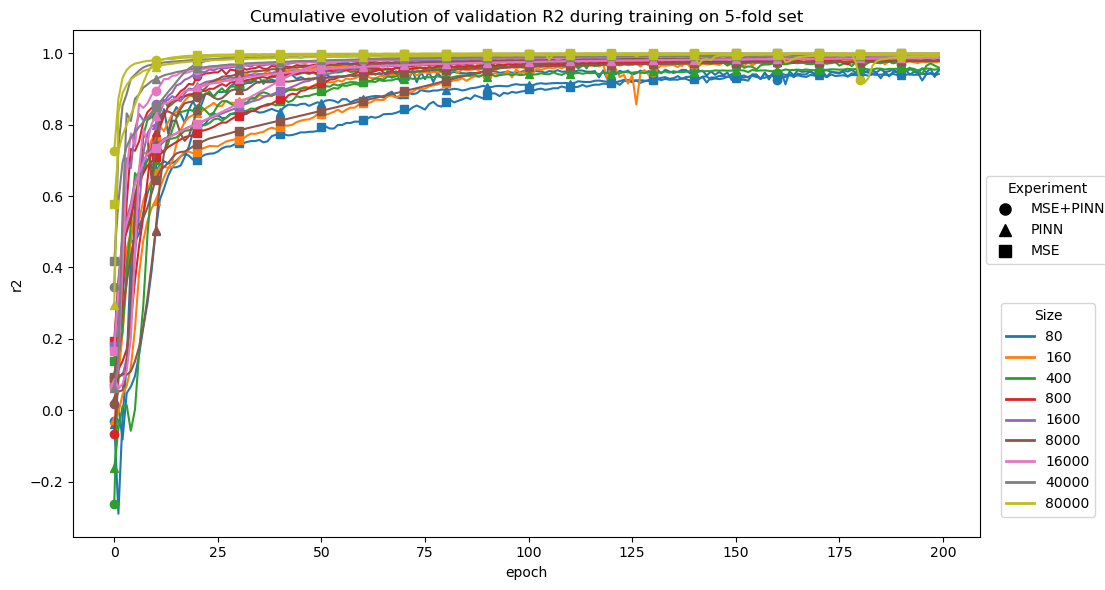

In [125]:
# Create a color mapping for different sizes
color_map = {}
for i, size in enumerate(sizes):
    color_map[size] = f'C{i}'

# Track what we've added to the legend
size_handles = []
size_labels = []
experiment_handles = []
experiment_labels = []

# Plot the data
for metric in metrics:
    metric_name = f"val_{metric}"
    fig, ax = plt.subplots(figsize=(10, 6))
    for size in sizes:
        for experiment_name in experiment_names:
            marker = markers[experiment_name]
            color = color_map[size]
            try:
                metric_value = [float(x) for x in data[experiment_name][size][metric_name]]
                """if metric == 'r2':
                    metric_value = np.maximum.accumulate(metric_value)
                else:
                    metric_value = np.minimum.accumulate(metric_value)"""
            except Exception:
                continue
            epoch = np.arange(len(metric_value))

            line, = ax.plot(epoch, metric_value, marker=marker, markevery=10,
                            color=color, label=f"{names[experiment_name]}, Size: {size}")

            # For the legend, track the unique combinations we've seen
            if size not in size_labels:
                size_handles.append(Line2D([0], [0], color=color, lw=2, marker=None))
                size_labels.append(size)

            if names[experiment_name] not in experiment_labels:
                experiment_handles.append(Line2D([0], [0], color='black', marker=marker, lw=0,
                                               markerfacecolor='black', markersize=8))
                experiment_labels.append(names[experiment_name])

    ax.set_title(f"Cumulative evolution of validation {metric.upper()} during training on 5-fold set")
    if metric != 'r2':
        ax.set_yscale('log')
    ax.set_ylabel(metric)
    ax.set_xlabel("epoch")

    # Adjust the plot area to make room for the legends on the right
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Create a custom legend for experiments (markers) - place it in the upper right
    legend1 = ax.legend(experiment_handles, experiment_labels,
                       loc='lower center', bbox_to_anchor=(1.075, .525),
                       title="Experiment")
    ax.add_artist(legend1)

    # Create a custom legend for sizes (colors) - place it below the first legend
    legend2 = ax.legend(size_handles, [f"{size}" for size in size_labels],
                       loc='upper center', bbox_to_anchor=(1.075, 0.475),
                       title="Size")

    plt.tight_layout()
    plt.savefig(f"figures/single_ea/dataset_size/{metric_name}_datasetsize.pdf", bbox_inches='tight', pad_inches=0.5)
    plt.show()

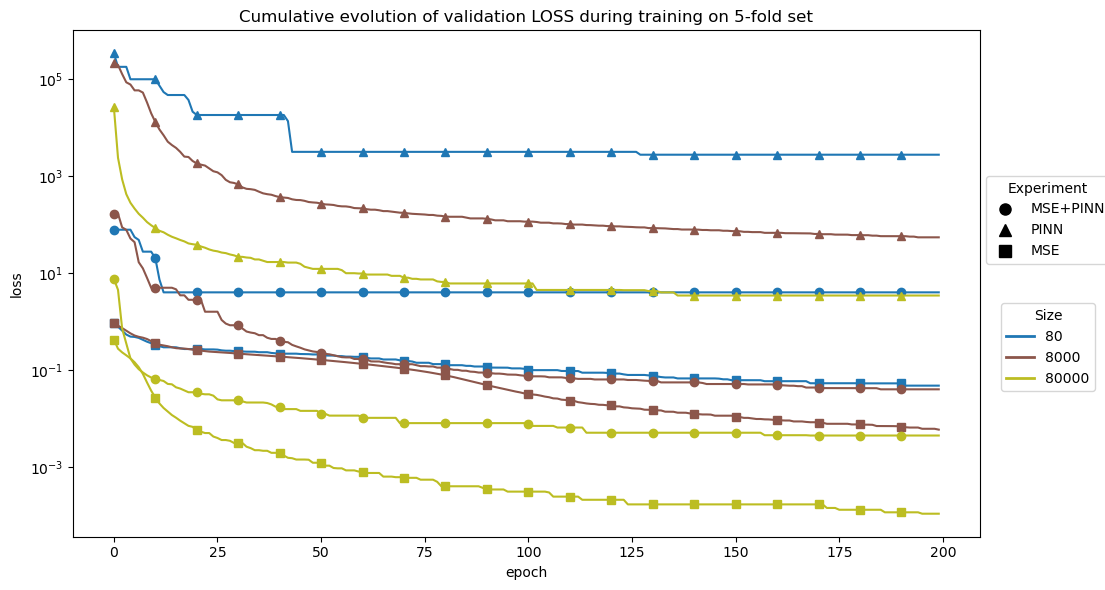

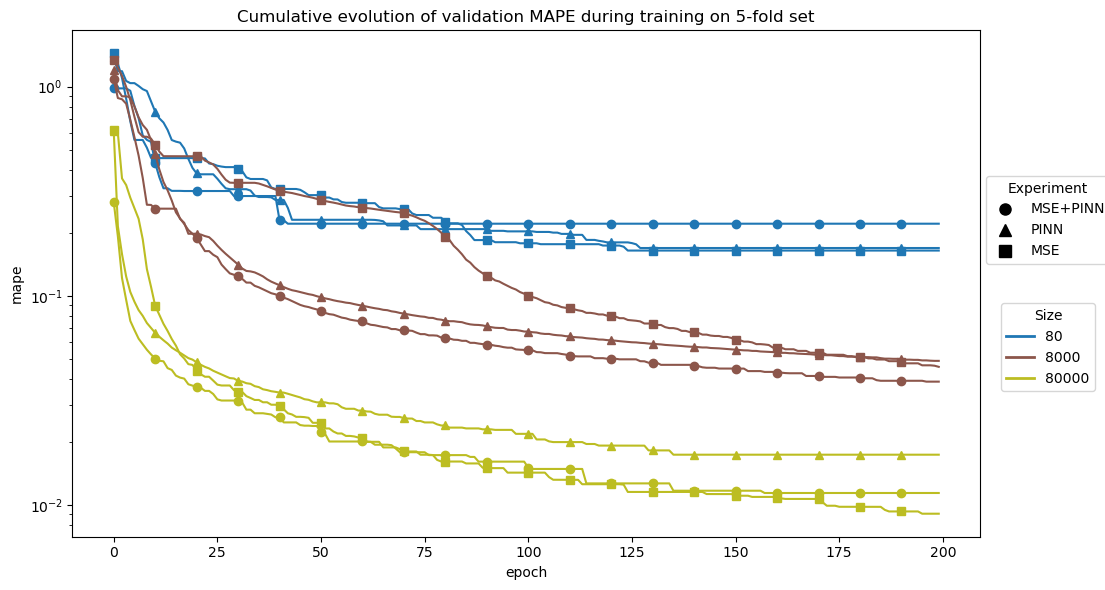

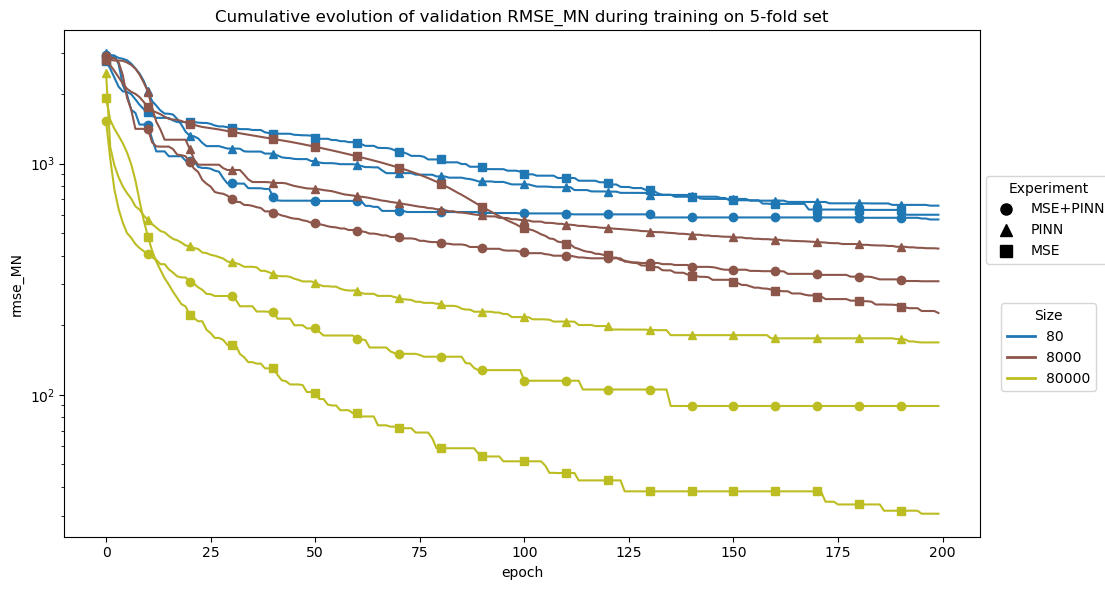

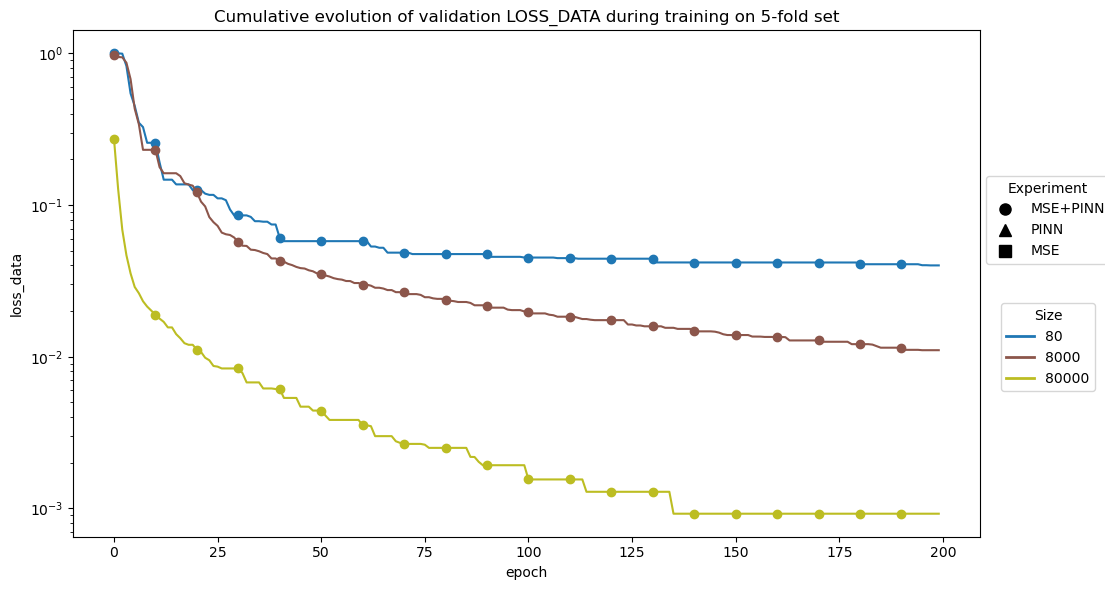

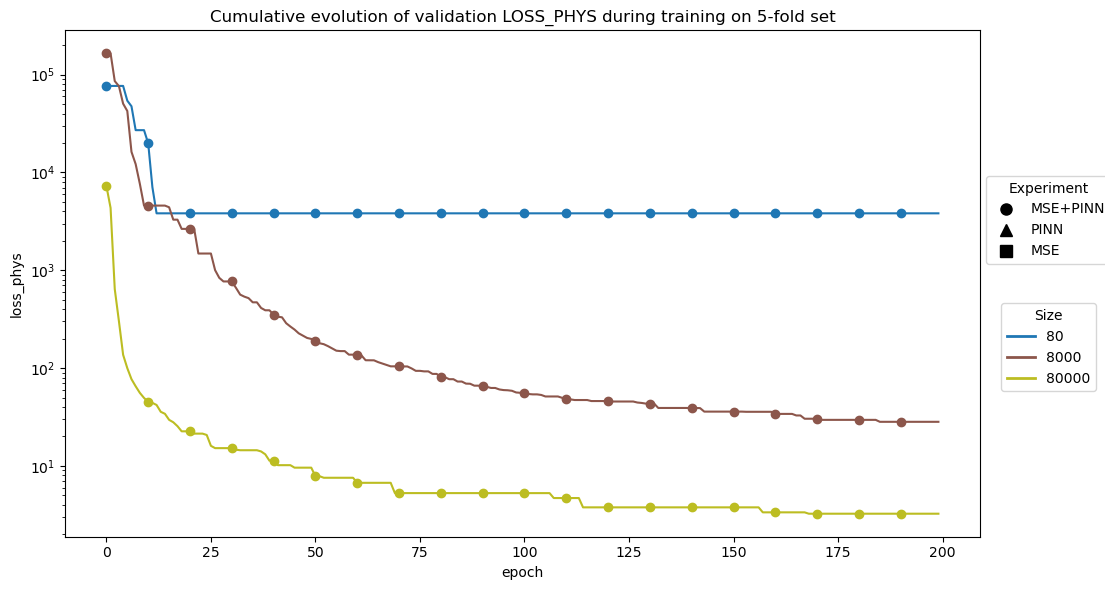

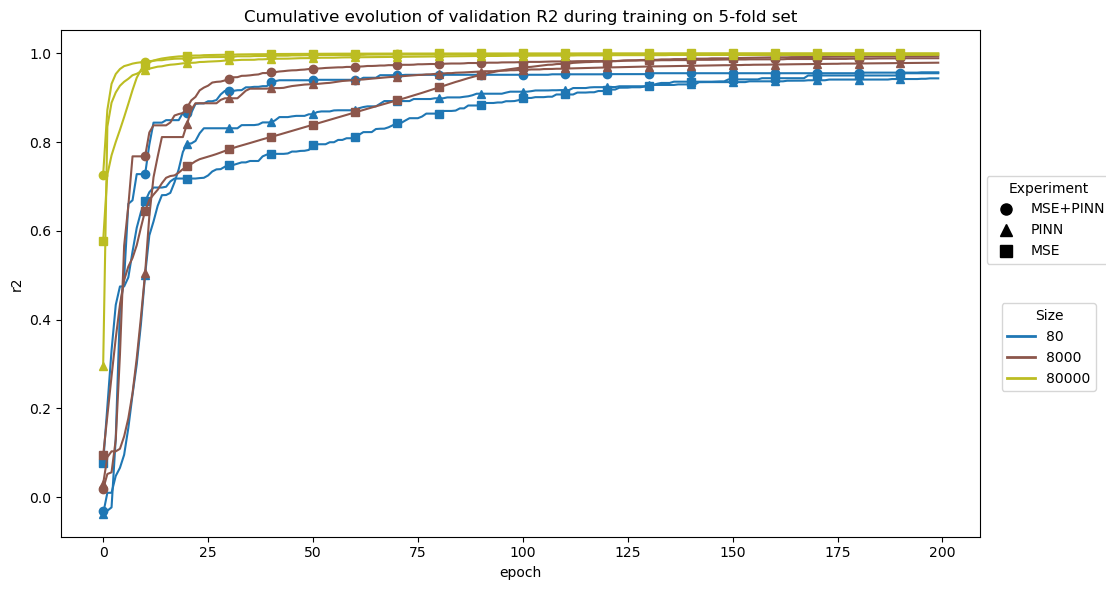

In [129]:
# Create a color mapping for different sizes
color_map = {}
for i, size in enumerate(sizes):
    color_map[size] = f'C{i}'

# Track what we've added to the legend
size_handles = []
size_labels = []
experiment_handles = []
experiment_labels = []

# Plot the data
for metric in metrics:
    metric_name = f"val_{metric}"
    fig, ax = plt.subplots(figsize=(10, 6))
    for size in ['80', '8000', '80000']:
        for experiment_name in experiment_names:
            marker = markers[experiment_name]
            color = color_map[size]
            try:
                metric_value = [float(x) for x in data[experiment_name][size][metric_name]]
                if metric == 'r2':
                    metric_value = np.maximum.accumulate(metric_value)
                else:
                    metric_value = np.minimum.accumulate(metric_value)
            except Exception:
                continue
            epoch = np.arange(len(metric_value))

            line, = ax.plot(epoch, metric_value, marker=marker, markevery=10,
                            color=color, label=f"{names[experiment_name]}, Size: {size}")

            # For the legend, track the unique combinations we've seen
            if size not in size_labels:
                size_handles.append(Line2D([0], [0], color=color, lw=2, marker=None))
                size_labels.append(size)

            if names[experiment_name] not in experiment_labels:
                experiment_handles.append(Line2D([0], [0], color='black', marker=marker, lw=0,
                                               markerfacecolor='black', markersize=8))
                experiment_labels.append(names[experiment_name])

    ax.set_title(f"Cumulative evolution of validation {metric.upper()} during training on 5-fold set")
    if metric != 'r2':
        ax.set_yscale('log')
    ax.set_ylabel(metric)
    ax.set_xlabel("epoch")

    # Adjust the plot area to make room for the legends on the right
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Create a custom legend for experiments (markers) - place it in the upper right
    legend1 = ax.legend(experiment_handles, experiment_labels,
                       loc='lower center', bbox_to_anchor=(1.075, .525),
                       title="Experiment")
    ax.add_artist(legend1)

    # Create a custom legend for sizes (colors) - place it below the first legend
    legend2 = ax.legend(size_handles, [f"{size}" for size in size_labels],
                       loc='upper center', bbox_to_anchor=(1.075, 0.475),
                       title="Size")

    plt.tight_layout()
    plt.savefig(f"figures/single_ea/dataset_size/{metric_name}_datasetsize_sample_cummin.pdf", bbox_inches='tight', pad_inches=0.5)
    plt.show()

In [ ]:
data = {}
experiment_names = ["MSE_no_noise_dataset_size"]

for experiment_name in experiment_names:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    runs_df = mlflow.search_runs(experiment_ids=[experiment.experiment_id])

    cols = [c for c in runs_df if c.startswith('metrics.')]
    metrics_names = [col[col.index('.') + 1:] for col in cols]
    del cols

    sizes = sorted(set(runs_df['params.train_size'].unique()), key=lambda x: int(x))

    client = mlflow.tracking.MlflowClient()
    results = {k1: {k2: [] for k2 in metrics_names} for k1 in sizes}
    for size in sizes:
        run_ids = runs_df[runs_df['params.train_size'] == size]['run_id']
        for run_id in run_ids:
            for metric_name in metrics_names:
                results[size][metric_name].append([m.value for m in client.get_metric_history(run_id, metric_name)])

    for k in results.keys():
        for metric in results[k].keys():
            results[k][metric] = np.vstack(results[k][metric]).mean(axis=0)

    data[experiment_name] = results

sizes = list(data[experiment_names[0]].keys())
metrics = list(data[experiment_names[0]][sizes[0]])
metrics = set(["_".join(m.split('_')[1:]) for m in metrics])